# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Mahmoud Ammash

Datum: 20.11.2023

Gruppe: 10

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Kann man Newton Abkühlungsgesetz bestätigen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.  ----- iCH HABE EINEN sensor im raum platziert und den anderen im heißen wasser in einem Glass  und 10 min abgewartet.
<img src="figures/newton.jpg" width="800">


## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [6]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = 'data/newton_data/newton_data.h5'

# DONE #

In [10]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py as h5
with h5.File(path) as k:
    # save group1 in example.h5 to variable g.
    g = k["RawData"]
    # read group1 attribute authors.
    timestampcup = k["RawData/1ee8625c-c3b1-6585-9d06-596340fc5960/timestamp"]
    temperaturecup = k["RawData/1ee8625c-c3b1-6585-9d06-596340fc5960/temperature"]
    timestampenv = k["RawData/1ee8626a-b673-67ff-b0bc-2dc32d8ae097/timestamp"]
    temperatureenv = k["RawData/1ee8626a-b673-67ff-b0bc-2dc32d8ae097/temperature"]
    
    
    
    # read dataset2 attribute description.
    
    # read first element of dataset1 and print.
    print(timestampcup[10])
    
    timestamp_cup=np.array(timestampcup)
    temperature_cup=np.array(temperaturecup)
    timestamp_env=np.array(timestampenv)
    temperature_env=np.array(temperatureenv)

# DONE #

16.82356905937195


#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

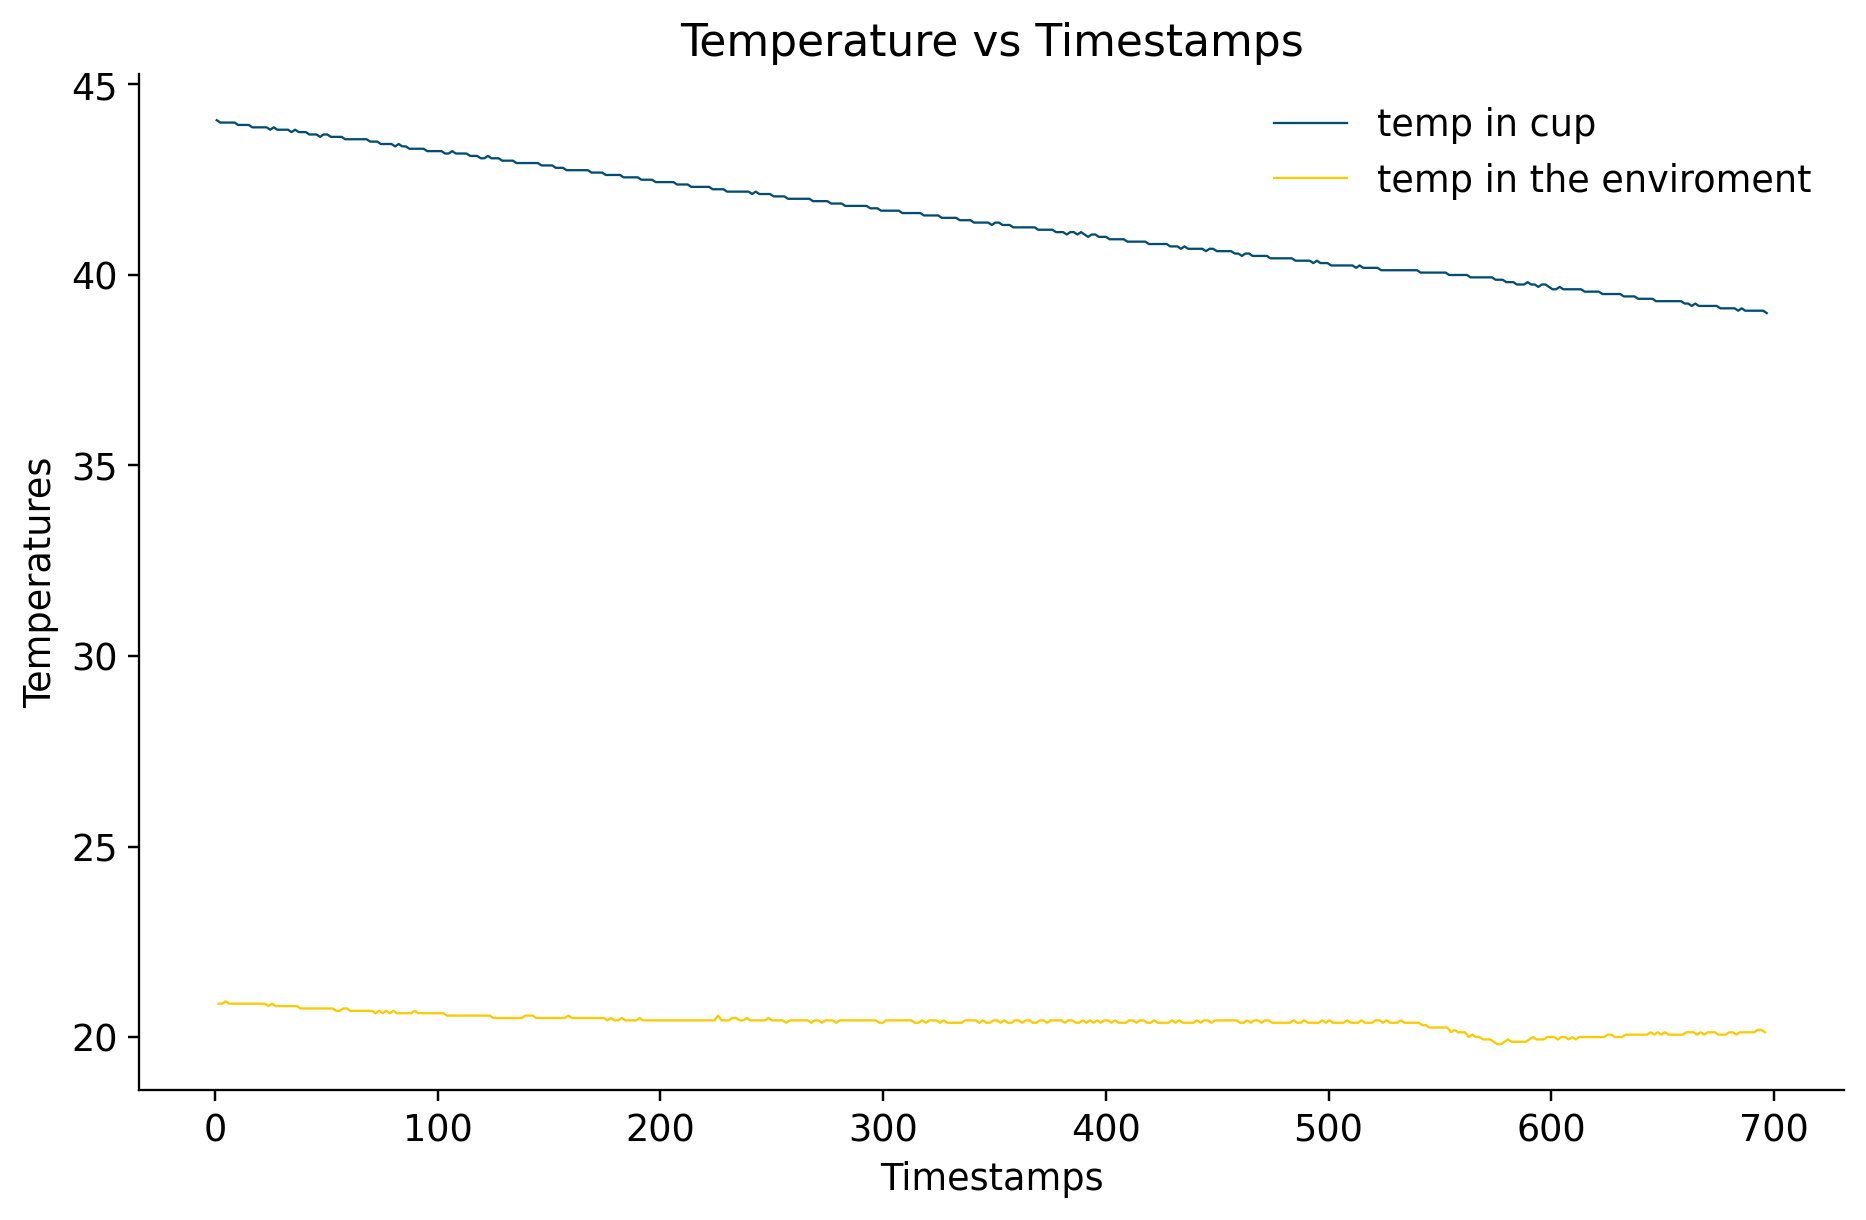

In [13]:
# TODO: Use the temperature and time data for plotting
import h5py
        # Open the HDF5 file in read mode


            # Convert timestamps to datetime objects if needed
            # timestamps = [datetime.utcfromtimestamp(ts) for ts in timestamps]

            # Plotting
plt.figure(figsize=(10, 6))
plt.plot(timestamp_cup, temperature_cup,label='temp in cup')
plt.plot(timestamp_env, temperature_env,label='temp in the enviroment')
plt.xlabel('Timestamps')
plt.ylabel('Temperatures')
plt.title('Temperature vs Timestamps')
plt.legend()
plt.show()

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [33]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
import numpy as np

# Your data: time (t) and tcalorimetry_homeemperature (T)
num_points = 10
t = np.linspace(0, 20, num_points)  # Replace this with your actual time data
T2 = temperature_cup[21]
T1 = temperature_cup[0]
Tt = np.linspace(temperature_env[0], temperature_env[21], num_points)

# Calculate the temperature difference
Tt_minus_T2 = T1 - T2

# Create an array of the same length as t with the constant value log(Tt_minus_T2)
log_Tt_minus_T2 = np.full_like(t, np.log(Tt_minus_T2))

# Linear fit to get the slope, which corresponds to the coefficient K
coefficients = np.polyfit(t, log_Tt_minus_T2, 1)

# The coefficient K is the slope of the linear fit
K = coefficients[0]

print("Der Koeffizient K ist:", K)

# DONE #

Der Koeffizient K ist: -7.255772998532474e-18


#### (iV) Ergebnis

In [ ]:
# TODO: Print result

print("Der Koeffizient K ist:", K)

# DONE #

## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Ich kann newton Abkühlungsgesetz bestätgen da mein K hat gezeigt dass die cup temperature hat sich vermindert.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Die gefolgte strategie kann auf verschiedene bereiche verwendet werden um wichtige Werte zu finden.